In [114]:
import nltk
import spacy
import re
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.probability import FreqDist

from spacy import displacy

from wordcloud import WordCloud

from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

## Import the data set

In [3]:
#import the text of the book
# with open('data/The last days of the captain.txt', 'r', encoding = 'utf8' ) as book:
with open('data/harry-potter-book-collection-1.txt', 'r', encoding = 'utf8' ) as book:
    hp1 = str(book.read().replace('\n',''))

need to remove page numbers

In [4]:
#May not do anything since it does not have any page number on the text file.
page_pattern = re.compile('(Page ..\d* .Harry Potter and the Philosophers Stone ..J.K..Rowling)')
match = page_pattern.match(hp1)

In [5]:
#create a new variable 
hp1_clean = re.sub(page_pattern, '', hp1)

The title of the book along with the page number are removed

In [6]:
#load the en_core_web_sm
nlp = spacy.load('en_core_web_sm')

#instatiate the text
spcy_hp1 = nlp(hp1_clean)

In [7]:
#a for loop to display the entities in the text
for x in spcy_hp1.ents:
    print(f'{x.text}: {x.label_}')

Harry Potter: PERSON
Sorcerer: ORG
StoneJ.K.: CARDINAL
LIVEDMr: WORK_OF_ART
Dursley: PERSON
number four: CARDINAL
Privet Drive: FAC
Dursley: PERSON
Grunnings: ORG
Dursley: PERSON
Dursleys: PERSON
Dudley: PERSON
Potters: ORG
Potter: PERSON
Dursley: PERSON
several years: DATE
Dursley: PERSON
Dursleys: PERSON
Potters: ORG
thePotters: ORG
Potters: ORG
Dudley: PERSON
Dursley: PERSON
Tuesday: DATE
Dursley: PERSON
Dursley: PERSON
Dursley: PERSON
Dursley: PERSON
Dudley: PERSON
Dudley: PERSON
Dursley: PERSON
four: CARDINAL
first: ORDINAL
second: ORDINAL
Dursley: PERSON
PrivetDrive: ORG
Dursley: PERSON
Dursley: GPE
Privet Drive: FAC
Dursley: PERSON
that day: DATE
Dursley: PERSON
Dursley: PERSON
Dursley: PERSON
a few minutes later: TIME
Dursley: PERSON
Grunnings: ORG
Dursley: PERSON
ninth: ORDINAL
that morning: TIME
nighttime: TIME
Dursley: PERSON
five: CARDINAL
Dursley: PERSON
Harry: PERSON
Harry: PERSON
Harvey: PERSON
Harold: PERSON
Dursley: PERSON
five o'clock: TIME
a few seconds: TIME
Dursley

In [8]:
#highlight the entities
displacy.render(spcy_hp1, style='ent')

looks like spacy classify most of the words correctly with some exceptions.

# Tokenize

In [10]:
#function to separate and clean the text from punctuation
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [13]:
#run the function to remove punctuations
token_hp1 = separate_punc(hp1_clean)

In [14]:
nltk.pos_tag(token_hp1)

[('harry', 'NN'),
 ('potter', 'NN'),
 ('andthe', 'VBP'),
 ('sorcerer', 'NN'),
 ("'s", 'POS'),
 ('stonej.k.', 'JJ'),
 ('rowlingchapter', 'NN'),
 ('onethe', 'NN'),
 ('boy', 'NN'),
 ('who', 'WP'),
 ('livedmr', 'VBZ'),
 ('and', 'CC'),
 ('mrs.', 'JJ'),
 ('dursley', 'NN'),
 ('of', 'IN'),
 ('number', 'NN'),
 ('four', 'CD'),
 ('privet', 'NN'),
 ('drive', 'NN'),
 ('were', 'VBD'),
 ('proud', 'JJ'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('  ', 'NNS'),
 ('that', 'IN'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('perfectly', 'RB'),
 ('normal', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('very', 'RB'),
 ('much', 'RB'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('people', 'NNS'),
 ('you', 'PRP'),
 ("'d", 'MD'),
 ('expect', 'VB'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('involved', 'VBN'),
 ('in', 'IN'),
 ('anything', 'NN'),
 ('strange', 'JJ'),
 ('or', 'CC'),
 ('mysterious', 'JJ'),
 ('because', 'IN'),
 ('they', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('hold', 'VB'),
 ('with

In [15]:
#create the frequency distribution 
hp1_fd = FreqDist(token_hp1)
#print the top 10
hp1_fd.most_common(10)

[('the', 3483),
 ('and', 1857),
 ('to', 1828),
 ('he', 1642),
 ('a', 1634),
 ('was', 1242),
 ('of', 1240),
 ('harry', 1156),
 ('it', 1087),
 ("'s", 990)]

In [16]:
#remove punctuation 
hp1_nop = []

for w in token_hp1:
    if w.isalpha():
        hp1_nop.append(w.lower())
    
print(hp1_nop)

['harry', 'potter', 'andthe', 'sorcerer', 'rowlingchapter', 'onethe', 'boy', 'who', 'livedmr', 'and', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'they', 'were', 'the', 'last', 'people', 'you', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'did', 'hold', 'with', 'such', 'nonsense', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', 'which', 'made', 'drills', 'he', 'was', 'a', 'big', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', 'spying', 'on', 'the', 'neighbors'

[('the', 3483), ('and', 1857), ('to', 1828), ('he', 1642), ('a', 1634), ('was', 1242), ('of', 1240), ('harry', 1156), ('it', 1087), ('in', 947)]


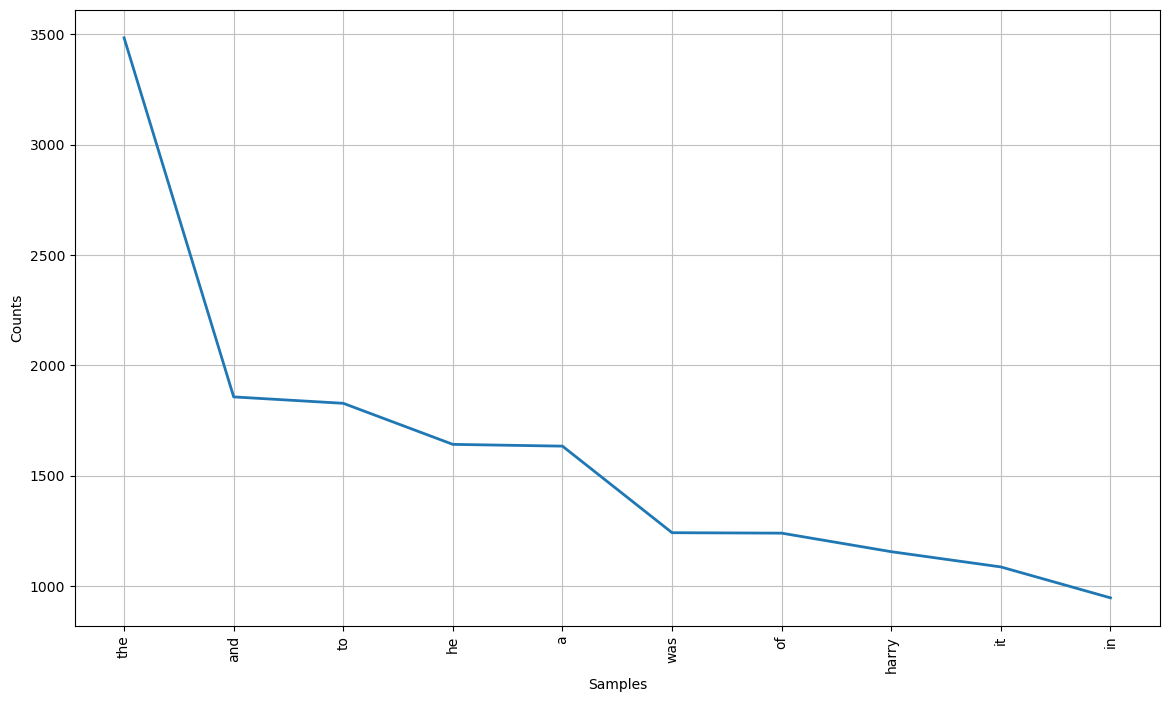

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
#plot the frequency of the cleaned text
hp1_fd = FreqDist(hp1_nop)

print(hp1_fd.most_common(10))
plt.figure(figsize=(14,8))
hp1_fd.plot(10)

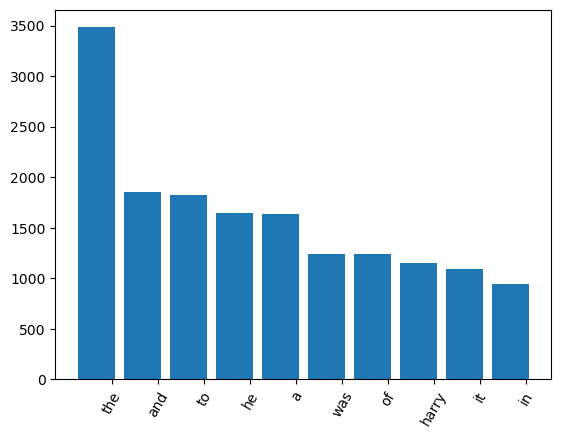

In [100]:
#plot the histogram of the 10 most common words of the cleaned text
from collections import Counter

counts = Counter(hp1_fd)

labels, values = zip(*counts.most_common(10))

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.xticks(rotation=60)
plt.show()

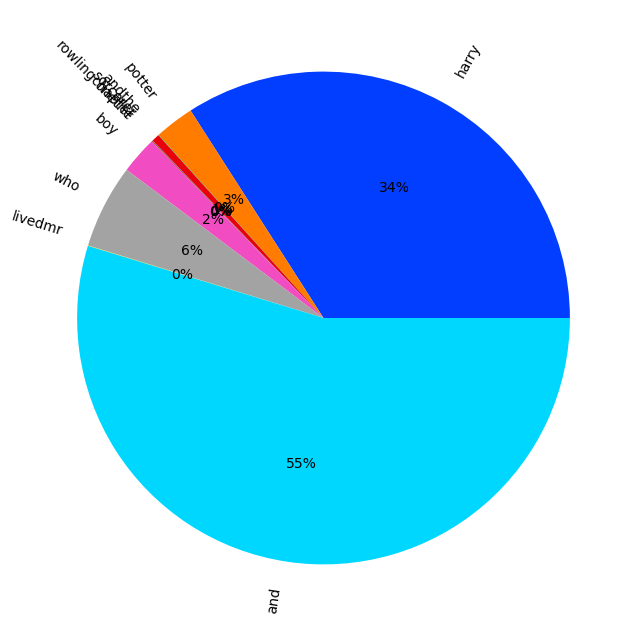

In [120]:
#plot a pie chart of the first 10 words on hp1_fd clean text
# declaring data 
data = list(hp1_fd.values())
keys = list(hp1_fd.keys())

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('bright') 

plt.figure(figsize=(14,8))
  
# plotting data on chart 
plt.pie(data[0:10], labels=keys[0:10], colors=palette_color, autopct='%.0f%%', rotatelabels=True) 


# displaying chart 
plt.show() 

In [18]:
#instatiate the stop words
stpwords = stopwords.words('english')

#empty list to append to
hp1_stp_clean = []

# for loop to remove stopwords
for w in hp1_nop:
    if w not in stpwords:
        hp1_stp_clean.append(w)
        
print(hp1_stp_clean)

['harry', 'potter', 'andthe', 'sorcerer', 'rowlingchapter', 'onethe', 'boy', 'livedmr', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'hold', 'nonsense', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drills', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'dursley', 'thin', 'blonde', 'nearly', 'twice', 'usual', 'amount', 'neck', 'came', 'useful', 'spent', 'much', 'time', 'craning', 'garden', 'fences', 'spying', 'neighbors', 'dursleys', 'small', 'son', 'called', 'dudley', 'opinion', 'finer', 'boy', 'anywhere', 'dursleys', 'everything', 'wanted', 'also', 'secret', 'greatest', 'fear', 'somebody', 'would', 'discover', 'think', 'could', 'bear', 'anyone', 'found', 'potters', 'potter', 'dursley', 'sister', 'met', 'several', 'years', 'fact', 'dursley', 'pretended', 'sister', 'sister', 'good', 'nothing', 'husband', 'un

In [19]:
print(f'Length of cleaned text: {len(hp1_stp_clean)}')

Length of cleaned text: 39366


[('harry', 1156), ('said', 789), ('ron', 398), ('hagrid', 327), ('could', 295), ('back', 255), ('one', 242), ('hermione', 239), ('know', 205), ('got', 202)]


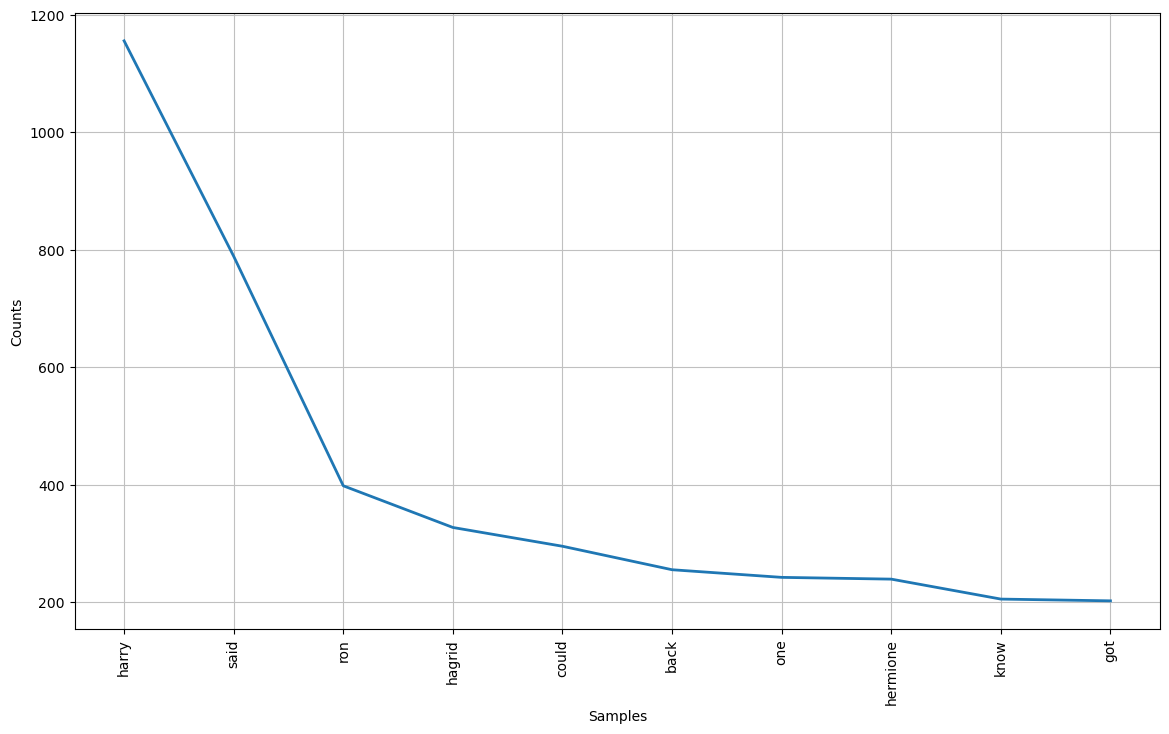

<Axes: xlabel='Samples', ylabel='Counts'>

In [49]:
#plot the frequency of the cleaned text
hp1_fd_clean = FreqDist(hp1_stp_clean)

print(hp1_fd_clean.most_common(10))
plt.figure(figsize=(14,8))
hp1_fd_clean.plot(10)

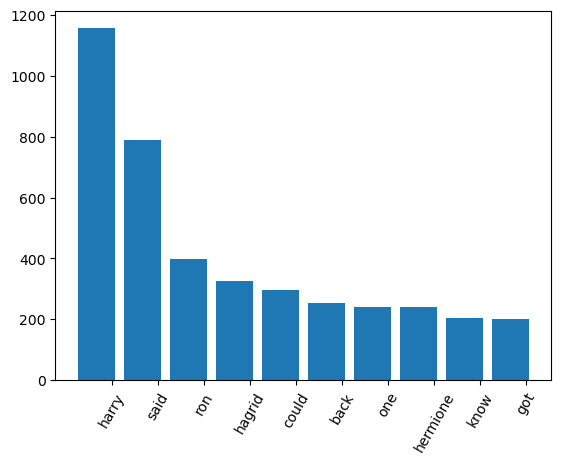

In [99]:
#plot the histogram of the 10 most common words of the clean text without stopwords
from collections import Counter

counts = Counter(hp1_fd_clean)

labels, values = zip(*counts.most_common(10))

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.xticks(rotation=60)
plt.show()

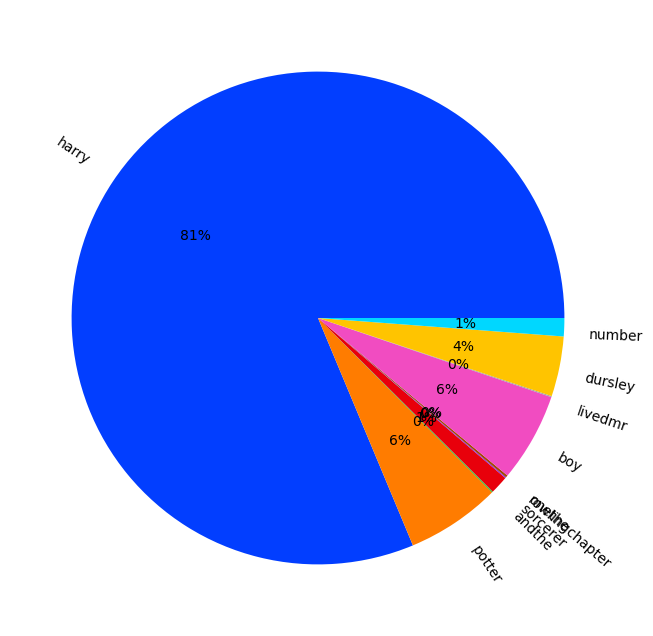

In [140]:
#plot a pie chart of the first 10 words on hp1_fd_clean text without stopwords
# declaring data 
data = list(hp1_fd_clean.values())
keys = list(hp1_fd_clean.keys())

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('bright') 

plt.figure(figsize=(14,8))
  
# plotting data on chart 
plt.pie(data[0:10], labels=keys[0:10], colors=palette_color, autopct='%.0f%%', rotatelabels=True) 


# displaying chart 
plt.show() 

# WORDCLOUD

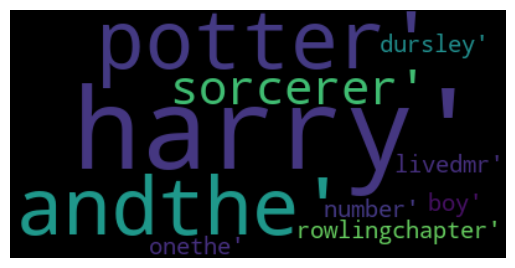

In [21]:
# Create and generate a word cloud image with the 10 first clean words:
wordcloud = WordCloud().generate(str(hp1_stp_clean[0:10]))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

look like main characters have the most common occurance as expected.

# LSTM to predict the next word

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([hp1_stp_clean])
encoded_data = tokenizer.texts_to_sequences([hp1_stp_clean])[0]

In [23]:
#vocab size
vocab_size = len(tokenizer.word_index)+1
print(f'Vocabulary size: {vocab_size}')

Vocabulary size: 6037


In [24]:
encoded_data[0:20]

[1,
 50,
 3142,
 439,
 3143,
 2271,
 54,
 3144,
 107,
 440,
 209,
 629,
 467,
 1023,
 70,
 1293,
 752,
 1024,
 61,
 55]

In [25]:
sequences = []

for y in range(1, len(encoded_data)):
    sequence = encoded_data[y-1:y+1]
    sequences.append(sequence) 

print(f'Total sequences:{len(sequences)}' )

Total sequences:39365


In [26]:
#turn sequences into array
sequences = np.array(sequences)

#split the sequences
X,y = sequences[:,0],sequences[:,1]

In [27]:
#onehot encoding 

y=to_categorical(y, num_classes=vocab_size)

In [28]:
#creating a sequential model
prd_wrd_model = Sequential()

#first layer using embedding 
prd_wrd_model.add(Embedding(vocab_size, 10, input_length = 1))'

#second hidden layer using LSTM
prd_wrd_model.add(LSTM(50))

#third ouput layer using Dense
prd_wrd_model.add(Dense(vocab_size, activation='softmax'))
print(prd_wrd_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             60370     
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 6037)              307887    
                                                                 
Total params: 380457 (1.45 MB)
Trainable params: 380457 (1.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
prd_wrd_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [30]:
prd_wrd_model.fit(X, y, epochs=500)

Epoch 1/500
1231/1231 [==============================] - 3s 2ms/step - loss: 7.7921 - accuracy: 0.0291
Epoch 2/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.4176 - accuracy: 0.0293
Epoch 3/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.3686 - accuracy: 0.0294
Epoch 4/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.3240 - accuracy: 0.0306
Epoch 5/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.2782 - accuracy: 0.0312
Epoch 6/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.2330 - accuracy: 0.0321
Epoch 7/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.1804 - accuracy: 0.0343
Epoch 8/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.1245 - accuracy: 0.0359
Epoch 9/500
1231/1231 [==============================] - 2s 2ms/step - loss: 7.0697 - accuracy: 0.0369
Epoch 10/500
1231/1231 [==============================] - 2s 2ms/step - l

1231/1231 [==============================] - 2s 2ms/step - loss: 4.0166 - accuracy: 0.1803
Epoch 80/500
1231/1231 [==============================] - 2s 2ms/step - loss: 4.0084 - accuracy: 0.1801
Epoch 81/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9998 - accuracy: 0.1803
Epoch 82/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9918 - accuracy: 0.1800
Epoch 83/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9840 - accuracy: 0.1809
Epoch 84/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9759 - accuracy: 0.1804
Epoch 85/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9690 - accuracy: 0.1810
Epoch 86/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9615 - accuracy: 0.1801
Epoch 87/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.9546 - accuracy: 0.1789
Epoch 88/500
1231/1231 [==============================] - 2s 2ms/step - loss:

1231/1231 [==============================] - 2s 2ms/step - loss: 3.7096 - accuracy: 0.1763
Epoch 158/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.7070 - accuracy: 0.1769
Epoch 159/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.7060 - accuracy: 0.1752
Epoch 160/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.7039 - accuracy: 0.1783
Epoch 161/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.7023 - accuracy: 0.1774
Epoch 162/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.7005 - accuracy: 0.1762
Epoch 163/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6990 - accuracy: 0.1762
Epoch 164/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6980 - accuracy: 0.1763
Epoch 165/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6960 - accuracy: 0.1762
Epoch 166/500
1231/1231 [==============================] - 2s 2ms/ste

1231/1231 [==============================] - 2s 2ms/step - loss: 3.6152 - accuracy: 0.1748
Epoch 236/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6142 - accuracy: 0.1768
Epoch 237/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6138 - accuracy: 0.1761
Epoch 238/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6121 - accuracy: 0.1755
Epoch 239/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6122 - accuracy: 0.1761
Epoch 240/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6111 - accuracy: 0.1751
Epoch 241/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6109 - accuracy: 0.1751
Epoch 242/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6098 - accuracy: 0.1764
Epoch 243/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.6086 - accuracy: 0.1746
Epoch 244/500
1231/1231 [==============================] - 2s 2ms/ste

1231/1231 [==============================] - 2s 2ms/step - loss: 3.5649 - accuracy: 0.1766
Epoch 314/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5648 - accuracy: 0.1758
Epoch 315/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5644 - accuracy: 0.1750
Epoch 316/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5639 - accuracy: 0.1752
Epoch 317/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5633 - accuracy: 0.1739
Epoch 318/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5625 - accuracy: 0.1762
Epoch 319/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5623 - accuracy: 0.1749
Epoch 320/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5605 - accuracy: 0.1751
Epoch 321/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5611 - accuracy: 0.1744
Epoch 322/500
1231/1231 [==============================] - 2s 2ms/ste

1231/1231 [==============================] - 2s 2ms/step - loss: 3.5324 - accuracy: 0.1766
Epoch 392/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5319 - accuracy: 0.1742
Epoch 393/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5321 - accuracy: 0.1749
Epoch 394/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5321 - accuracy: 0.1747
Epoch 395/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5305 - accuracy: 0.1755
Epoch 396/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5308 - accuracy: 0.1759
Epoch 397/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5302 - accuracy: 0.1755
Epoch 398/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5305 - accuracy: 0.1738
Epoch 399/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5298 - accuracy: 0.1742
Epoch 400/500
1231/1231 [==============================] - 2s 2ms/ste

1231/1231 [==============================] - 2s 2ms/step - loss: 3.5093 - accuracy: 0.1742
Epoch 470/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5088 - accuracy: 0.1758
Epoch 471/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5086 - accuracy: 0.1750
Epoch 472/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5079 - accuracy: 0.1745
Epoch 473/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5086 - accuracy: 0.1744
Epoch 474/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5086 - accuracy: 0.1761
Epoch 475/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5070 - accuracy: 0.1750
Epoch 476/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5069 - accuracy: 0.1751
Epoch 477/500
1231/1231 [==============================] - 2s 2ms/step - loss: 3.5068 - accuracy: 0.1750
Epoch 478/500
1231/1231 [==============================] - 2s 2ms/ste

In [31]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model: model that was trained on text data
    tokenizer: tokenizer that was fit on text data
    seq_len:length of training sequence
    seed_text:raw text string to serve as the see
    num_gen_words:number of words to be generated by the model
    '''
    
    #Final Output
    output_text = []
    
    #Initial seed sequence
    input_text=seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it in a sequence 
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # predict class probabilities for each word - original
        #pred_word_ind = model.predict(pad_encoded, verbose=0)[0]
        
        #good for one word
        pred_word_ind = (model.predict(pad_encoded)).argmax()
        
        #pred_word_ind = (model.predict(pad_encoded)).astype("int32") 
        #pred_word_ind = (model.predict(pad_encoded)> 0.5)
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind]
        #pred_word = (tokenizer.index_word[pred_word_ind])
        
        #update the sequences of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
    
    #Make it look like a sentence
    return ' '.join(output_text)    

In [32]:
# print(generate_seq(prd_wrd_model, tokenizer, 'spell', 5))
print(generate_text(prd_wrd_model, tokenizer, vocab_size, 'spell', 5))

1/1 [==============================] - 0s 67ms/step
behind behind walked behind neville


In [33]:
# print(generate_seq(prd_wrd_model, tokenizer, 'hagrid', 5))
print(generate_text(prd_wrd_model, tokenizer, vocab_size, 'hagrid', 5))

1/1 [==============================] - 0s 68ms/step
behind behind behind long long


# Text Generation LSTM

In [34]:
# organize into sequences of tokens
train_len = 50 + 1 # 50 training words, then one target word

#Empty list of sequences
text_sequences = []

for i in range(train_len, len(token_hp1)):
    #Grab train len# amount of characters
    seq = token_hp1[i-train_len:i]
    
    #Add to list of sequences 
    text_sequences.append(seq)

In [35]:
#display the first 5 sequences
count = 0
while count < 5:
    print(f'{" ".join(text_sequences[count])}\n')
    count +=1 

harry potter andthe sorcerer 's stonej.k. rowlingchapter onethe boy who livedmr and mrs. dursley of number four privet drive were proud to say    that they were perfectly normal thank you very much they were the last people you 'd expect to be involved in anything strange or mysterious because they

potter andthe sorcerer 's stonej.k. rowlingchapter onethe boy who livedmr and mrs. dursley of number four privet drive were proud to say    that they were perfectly normal thank you very much they were the last people you 'd expect to be involved in anything strange or mysterious because they just

andthe sorcerer 's stonej.k. rowlingchapter onethe boy who livedmr and mrs. dursley of number four privet drive were proud to say    that they were perfectly normal thank you very much they were the last people you 'd expect to be involved in anything strange or mysterious because they just did

sorcerer 's stonej.k. rowlingchapter onethe boy who livedmr and mrs. dursley of number four privet dri

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [37]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

8 : harry
135 : potter
7359 : andthe
603 : sorcerer
10 : 's
7358 : stonej.k.
7357 : rowlingchapter
3521 : onethe
140 : boy
64 : who
7356 : livedmr
2 : and
276 : mrs.
211 : dursley
7 : of
602 : number
332 : four
841 : privet
638 : drive
35 : were
1337 : proud
3 : to
169 : say
74 :   
18 : that
19 : they
35 : were
1688 : perfectly
1007 : normal
1336 : thank
13 : you
76 : very
153 : much
19 : they
35 : were
1 : the
146 : last
125 : people
13 : you
43 : 'd
840 : expect
3 : to
29 : be
1687 : involved
11 : in
173 : anything
490 : strange
112 : or
1484 : mysterious
142 : because
19 : they


In [38]:
tokenizer.word_counts

OrderedDict([('harry', 58896),
             ('potter', 4439),
             ('andthe', 3),
             ('sorcerer', 820),
             ("'s", 50444),
             ('stonej.k.', 6),
             ('rowlingchapter', 7),
             ('onethe', 59),
             ('boy', 4191),
             ('who', 9496),
             ('livedmr', 11),
             ('and', 94657),
             ('mrs.', 2104),
             ('dursley', 2819),
             ('of', 63160),
             ('number', 832),
             ('four', 1700),
             ('privet', 579),
             ('drive', 784),
             ('were', 16389),
             ('proud', 327),
             ('to', 93118),
             ('say', 3593),
             ('  ', 8388),
             ('that', 33361),
             ('they', 32205),
             ('perfectly', 232),
             ('normal', 488),
             ('thank', 336),
             ('you', 46480),
             ('very', 8345),
             ('much', 3858),
             ('the', 177552),
             ('last',

In [39]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

7359

In [40]:
sequences_arr = np.array(sequences)
sequences_arr

array([[   8,  135, 7359, ..., 1484,  142,   19],
       [ 135, 7359,  603, ...,  142,   19,   71],
       [7359,  603,   10, ...,   19,   71,   39],
       ...,
       [ 103, 1206,   18, ...,   25,   89,   50],
       [1206,   18,  305, ...,   89,   50, 1193],
       [  18,  305,   38, ...,   50, 1193,    1]])

In [141]:
#create a function to create the lstm
def create_model(vocabulary_size, seq_len):
    
    #creating a sequential model
    model = Sequential()
    
    #first layer input layer is an embeded layer
    model.add(Embedding(vocabulary_size,50, input_length=seq_len))
    
    #second hidden layer is an LSTM layer 
    model.add(LSTM(150, return_sequences=True))
    
    #third hidden layer is an LSTM layer with only 150 unit
    model.add(LSTM(150))
    
    #fourth layer is a dense layer with a relu activation
    model.add(Dense(150, activation= 'relu'))
    
    #fifth layer is a dense layer with a softmax activation layer
    model.add(Dense(vocabulary_size, activation= 'softmax'))
    
    #compiling the model with a loss of categorical_crossentropy, and adam optimizer and metrics only to accuracy
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    model.summary()
    return model

In [42]:
X = sequences_arr[:,:-1]
y = sequences_arr[:,-1]

y = to_categorical(y, num_classes=vocabulary_size+1)

In [43]:
seq_len = X.shape[1]
seq_len

50

In [44]:
lstm_model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            368000    
                                                                 
 lstm_1 (LSTM)               (None, 50, 150)           120600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 7360)              1111360   
                                                                 
Total params: 1803210 (6.88 MB)
Trainable params: 1803210 (6.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
lstm_model.fit(X, y, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
2504/2504 [==============================] - 118s 47ms/step - loss: 6.7115 - accuracy: 0.0431
Epoch 2/20
2504/2504 [==============================] - 118s 47ms/step - loss: 6.2967 - accuracy: 0.0559
Epoch 3/20
2504/2504 [==============================] - 118s 47ms/step - loss: 5.9700 - accuracy: 0.0817
Epoch 4/20
2504/2504 [==============================] - 119s 47ms/step - loss: 5.7666 - accuracy: 0.0935
Epoch 5/20
2504/2504 [==============================] - 118s 47ms/step - loss: 5.6060 - accuracy: 0.1019
Epoch 6/20
2504/2504 [==============================] - 118s 47ms/step - loss: 5.4622 - accuracy: 0.1094
Epoch 7/20
2504/2504 [==============================] - 118s 47ms/step - loss: 5.3265 - accuracy: 0.1171
Epoch 8/20
2504/2504 [==============================] - 118s 47ms/step - loss: 5.2035 - accuracy: 0.1228
Epoch 9/20
2504/2504 [==============================] - 660s 263ms/step - loss: 5.0947 - accuracy: 0.1289
Epoch 10/20
2504/2504 [==============================]

smaller batch size give me higher accuracy and smaller loss

In [46]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model: model that was trained on text data
    tokenizer: tokenizer that was fit on text data
    seq_len:length of training sequence
    seed_text:raw text string to serve as the see
    num_gen_words:number of words to be generated by the model
    '''
    
    #Final Output
    output_text = []
    
    #Initial seed sequence
    input_text=seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it in a sequence 
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # predict class probabilities for each word - original
        #pred_word_ind = model.predict(pad_encoded, verbose=0)[0]
        
        #good for one word
        pred_word_ind = (model.predict(pad_encoded)).argmax()
        
        #pred_word_ind = (model.predict(pad_encoded)).astype("int32") 
        #pred_word_ind = (model.predict(pad_encoded)> 0.5)
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind]
        #pred_word = (tokenizer.index_word[pred_word_ind])
        
        #update the sequences of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
    
    #Make it look like a sentence
    return ' '.join(output_text)    

In [47]:
random.seed(101)
random_pick = random.randint(0, len(text_sequences))
random_seed_text = text_sequences[random_pick]
seed_text = ' '.join(random_seed_text)
seed_text

"'s scar his head felt as though it was about to split in two he yelled struggling with all his might and to his surprise quirrell let go of him the pain in his head lessened he looked around wildly to see where quirrell had gone and saw him hunched in"

In [48]:
generate_text(lstm_model, tokenizer, seq_len, seed_text, num_gen_words = 50)

1/1 [==============================] - 0s 11ms/step


"the air and began to catch the stone and the same book and a bit of books and kidney tearing them and they were n't a baby said harry he was n't a very very door and the same book and a bit of books and kidney tearing them and"

# Conclusion

The first LSTM model performed poorly, the accuracy was flunctuating and not improving. The poor performance might be due to the simplicity of the model with only the embedding layer and one LSTM Layer.

The second model made to generate a sequence of word got a higher accuracy but still performed slightly better than the previous model also possibly due to it simplicity in layers.

To improve both models we may need to create better models with more layers. Perhaps following a different model other that an LSTM may improve the model.